  
##$$Netflix$$
##Problem Statement:
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.
Business Problem
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

Hints
--	The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
2.	Start by exploring a few questions: What type of content is available in different countries?
1.	How has the number of movies released per year changed over the last 20-30 years?
2.	Comparison of tv shows vs. movies.
3.	What is the best time to launch a TV show?
4.	Analysis of actors/directors of different types of shows/movies.
5.	Does Netflix has more focus on TV Shows than movies in recent years
6.	Understanding what content is available in different countries


In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 39.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Before Analysing the data we have identifying the missing values and other uncleaned datas within the given data :  so for that we have to check nullvalues which are checked as below

In [ ]:
data.isna().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Checking information{datatype,non_nullvalues,etc..} about data provided we use .info() as given below

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


After the above information it is clear that data type of date_added column is nothing but string so inorder to change its datatypewe can use pd.to_datetime() to change its datatype from string to datetime dtype so that all operation associated with date time could be applied

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Now coming to problem solvings

##Q1.How has the number of movies released per year changed over the last 20-30 years?

to attempt this first we have to filter out the movies type from the data provided so as to work easily upon it for that i had applied method as below

In [ ]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
data_movie = data.loc[data['type'] == 'Movie']
data_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


since this data is not sorted inorder to sort acoording to release year we can use .sort_values()

In [ ]:
data_movie_sorted = data_movie.sort_values('release_year',ascending=False)
data_movie_sorted


the sorted Movies need to be grouped by and also counted to get information of number of movies released according to year wise for that below text works

In [ ]:
movie_released_year_wise = data_movie_sorted.groupby(['release_year'])['release_year'].count()

since the data format is in series to convert we can use .to_frame()

In [ ]:
movie_released_year_wise =movie_released_year_wise.to_frame()

changing the name of columns as per requirement we can do this

In [ ]:
movie_released_year_wise.columns = ['Number_of_movies']

For getting number of movies according to latest year we can use .tail() for fetching bottom 30 rows as question ask for 30 - 40 years from current movie release

In [ ]:
Movie_30year_released= movie_released_year_wise.reset_index().tail(30)
Movie_30year_released

,release_year,Number_of_movies
43,1992,20
44,1993,24
45,1994,20
46,1995,23
47,1996,21
48,1997,34
49,1998,32
50,1999,32
51,2000,33
52,2001,40


in order to better understand this graph we can use bar plot ranging across years comparing number of movie released values w.r.t years

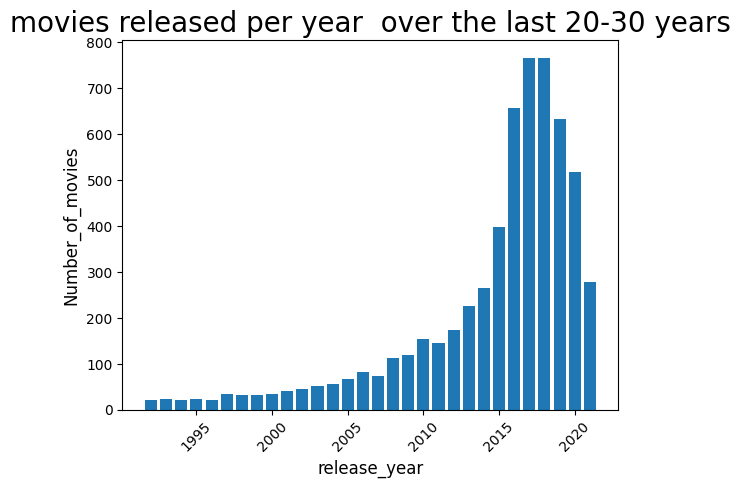

In [ ]:
plt.bar(Movie_30year_released['release_year'],Movie_30year_released['Number_of_movies'])
plt.xlabel('release_year',fontsize=12)
plt.ylabel('Number_of_movies',fontsize=12)
plt.title('movies released per year  over the last 20-30 years',fontsize=20)
plt.xticks(rotation= 45)
plt.show()

--- **Analysis**  : from the above graph it is clear that the platform have rich content of recently released movies as the graph goes up from 2005 to 2020 which shows that platform have most of thier Movies which are released in these years

--- **Recommendation** : the platform can add more of content form movies earlier than 2005 as it would help them increase their customer base as because there could be possiblity of people whoc like old movies which were released way back

## Dealing with missing values, comma seperated columns ,NAN,filtering etc..

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Dealing with comma seperated values

to check whether a column in data contains "," {comma} which could be containing data in nested form we can use syntax .str.contains for identifying them summing up would help in knowing the number of column having them


In [ ]:
data['director'].str.contains(",").sum()

614

In [ ]:
data['cast'].str.contains(",").sum()

7101

In [ ]:
data['country'].str.contains(",").sum()

1320

In [ ]:
data['listed_in'].str.contains(",").sum()

6787

It is clear from above observation that directo,cast,country,listed_in in the provided data are having elemeent with comma seperated or nested data

Inorder to deal with  Nested columns  we can use concept of unwrapping
whose elements are seperated by ","  using .str.split() for splitting the string into list and assigning back to their respective columns by process below






In [ ]:
data['director'] = data['director'].str.split(",")
data['cast'] =data['cast'].str.split(",")
data['country'] = data['country'].str.split(",")
data['listed_in'] = data['listed_in'].str.split(",")


So data below shows the element in list form assigned back into their columns {director,country,cast,listed_in}

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",[United States],2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",[United States],2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


#Exploding the data in list format in columns so as to tranform all element in list back into single and same columns however this process would generate more number of rows which is our aim

we can start by exploding 'Director' Column

In [ ]:
data_exploded = data.explode('director',ignore_index =True)
data_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
9607,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",[United States],"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
9608,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
9609,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",[United States],"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
9610,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


Exploding 'cast' column

In [ ]:
data_exploded = data_exploded.explode('cast',ignore_index =True)
data_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
70807,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,[India],"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
70808,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,[India],"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
70809,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,[India],"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
70810,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,[India],"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...


similar process for 'country' column

In [ ]:
data_exploded = data_exploded.explode('country',ignore_index =True)
data_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
89410,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
89411,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
89412,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
89413,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...


And lastly 'Listed_in' column

In [ ]:
data_exploded = data_exploded.explode('listed_in',ignore_index =True)
data_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


Finally through this process original data with 8807 rows get converted into 202065 rows

In [ ]:
data_exploded

in this exploded data we  have to check how many number of null/nan values we have so as to get better insight of missing values by using .isna().sum() we can do it as shown below

In [ ]:
data_exploded[['director','cast','country','rating','duration','date_added']].isna().sum()

director      50643
cast           2149
country       11897
rating           67
duration          3
date_added      158
dtype: int64

#Cleaning
there could be possibilty where all the three columns director , cast , country is all missing in same rows for which we can't use predictive technique to generate information for other columns as which we are going to do further so those rows are of no need for that we need to identify them at first place as shown below

In [ ]:
data_exploded[['director','cast','country','rating','duration','date_added']].loc[pd.isnull(data_exploded[[
    'director','cast','country','rating','duration','date_added']]).sum(axis=1)== 3]

,director,cast,country,rating,duration,date_added
85,NaN,NaN,NaN,TV-MA,1 Season,"September 24, 2021"
86,NaN,NaN,NaN,TV-MA,1 Season,"September 24, 2021"
353,NaN,NaN,NaN,TV-MA,1 Season,"September 24, 2021"
354,NaN,NaN,NaN,TV-MA,1 Season,"September 24, 2021"
355,NaN,NaN,NaN,TV-MA,1 Season,"September 24, 2021"
...,...,...,...,...,...,...
197394,NaN,NaN,NaN,TV-MA,1 Season,"December 27, 2017"
197395,NaN,NaN,NaN,TV-MA,1 Season,"December 27, 2017"
202006,NaN,NaN,NaN,TV-Y7,2 Seasons,"July 1, 2019"
202007,NaN,NaN,NaN,TV-Y7,2 Seasons,"July 1, 2019"


In [ ]:
row_to_drop = data_exploded.loc[pd.isnull(data_exploded[[
    'director','cast','country','rating','duration','date_added']]).sum(axis=1)== 3]


dropping those rows permanently we use.drop(......, inplace =True)

In [ ]:
data_exploded.drop(row_to_drop.index, inplace=True)

In [ ]:
data_exploded

#Filling Categorical missing values using prediction through other column values

#Director:  missing data_exploded directors name {nan} could be repalced with the director names using {type,listed_in'}  for most accurate prediction


changing data type of type and listed_in

In [ ]:
data_exploded['type'] = data_exploded['type'].astype(str)
data_exploded['listed_in'] = data_exploded['listed_in'].astype(str)


***applying proces***:  using group by apply , lambda fucntion and x.mode(), .fillna() we can replace the missing value as shown below :   1. grouping will assure that same type and listed_in wold have same director_name too thats why i took these 2 parameter further lambda fucntion will fill  all the null/nan values in the column of director of group made with the mode of all the maximum occuring director name in the same group and this will happen for all the group for all missing director further if there is any group where all director name are empty it will be replaced with 'no_director'

In [ ]:

data_exploded['director']=data_exploded.groupby(['type','listed_in'])['director'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'No_director'))

In [ ]:
data_exploded['director'].isna().sum()

0

now there is no null values as from above syntax an all null values have been  filled to check we can do--->

In [ ]:
data_exploded['director'].value_counts().sum()

201878

# Similarly filling missing value of Cast

In [ ]:
data_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201878 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201878 non-null  object
 1   type          201878 non-null  object
 2   title         201878 non-null  object
 3   director      201878 non-null  object
 4   cast          199913 non-null  object
 5   country       190168 non-null  object
 6   date_added    201721 non-null  object
 7   release_year  201878 non-null  int64 
 8   rating        201813 non-null  object
 9   duration      201875 non-null  object
 10  listed_in     201878 non-null  object
 11  description   201878 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
data['cast'].isna().sum()

825

number of cast missing are 825

To fill the null values in 'cast' column i will apply the same process using
{type,Listed_in,country,director}  for accurate prediction


In [ ]:

data_exploded['cast']=data_exploded.groupby(['type','listed_in','director'])['cast'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'No_cast'))

to check we can use.isna().sum()

In [ ]:
data_exploded['cast'].isna().sum()

0

# Similarly Filling missing value of country   i will use type,listed_in,director,cast

In [ ]:
data_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201878 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201878 non-null  object
 1   type          201878 non-null  object
 2   title         201878 non-null  object
 3   director      201878 non-null  object
 4   cast          201878 non-null  object
 5   country       190168 non-null  object
 6   date_added    201721 non-null  object
 7   release_year  201878 non-null  int64 
 8   rating        201813 non-null  object
 9   duration      201875 non-null  object
 10  listed_in     201878 non-null  object
 11  description   201878 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
data_exploded['country']=data_exploded.groupby(['type','listed_in','director','cast'])['country'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'No_data'))

In [ ]:
data_exploded['country'].isna().sum()

0

In [ ]:
data_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201878 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201878 non-null  object
 1   type          201878 non-null  object
 2   title         201878 non-null  object
 3   director      201878 non-null  object
 4   cast          201878 non-null  object
 5   country       201878 non-null  object
 6   date_added    201721 non-null  object
 7   release_year  201878 non-null  int64 
 8   rating        201813 non-null  object
 9   duration      201875 non-null  object
 10  listed_in     201878 non-null  object
 11  description   201878 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


-------------------------- All Missing value in director,cast,country have been filled now--------------------------------------

##Q.2 What is the best time to launch a TV show?

To deal with this problem we will use the original uncleaned data  as all the type that is Tv show and Movies are all availble and have no missing value similarly dates also have no missing values

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [ ]:
Tv_show_data = data.loc[data['type']=='TV Show'].reset_index()

we will extract tv shows only

In [ ]:
Tv_show_data

now changing data type of dat_added to perform operation on this column

In [ ]:
Tv_show_data['date_added'] = pd.to_datetime(Tv_show_data['date_added'])

To get month name from date column we use .dt.month_name() as syntax


In [ ]:
Tv_show_data['month'] = Tv_show_data['date_added'].dt.month_name()

to count the number of unique tv shows we can perform the operation as below

In [ ]:
Tv_show_data['show_id'].nunique()

2676

In [ ]:
Tv_show_data_monthwise = Tv_show_data[['show_id','month']]

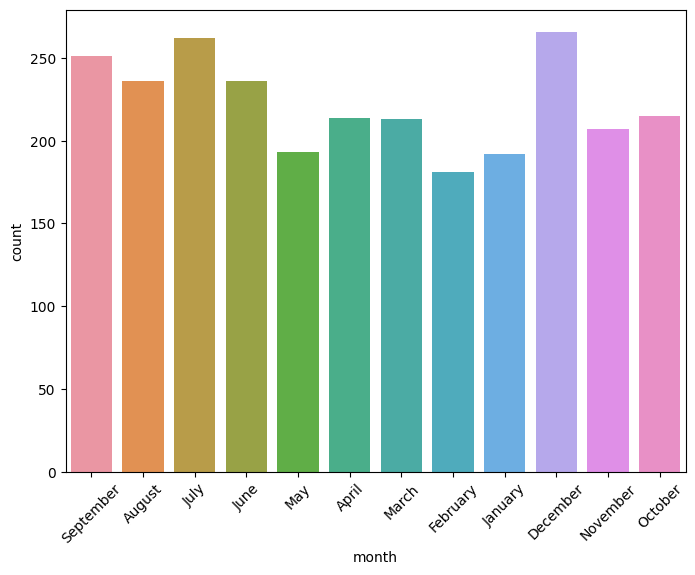

In [ ]:
plt.figure(figsize =(8,6))
sns.countplot(x='month',data= Tv_show_data_monthwise)
plt.xticks(rotation = 45)
plt.show()


**Insights**:  From the above graph it is clear that december has the highest number of tv_shows released on platform and it can be said that this month is the best time to release Tv shows as it have a trend from the data available

**Recommendations**: all the other months february,january and may should be need to be looked upon as these month have lowest number of tv shows released in ordor to engage more users this month need to release more tv shows.

#Q4.Analysis of actors/directors of different types of shows/movies.

Since this question contains lots of analysis so i have broken down the question into two parts  below i have done halaf of the analysis only for Movies and remaining Half i have i attempted in the last part of this notebook while doing other analysis in between



In [ ]:
Movies = data_exploded[data_exploded['type']=='Movie']
TV_show = data_exploded[data_exploded['type']=='TV Show']

In [ ]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145883 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       145883 non-null  object
 1   type          145883 non-null  object
 2   title         145883 non-null  object
 3   director      145883 non-null  object
 4   cast          145883 non-null  object
 5   country       145883 non-null  object
 6   date_added    145883 non-null  object
 7   release_year  145883 non-null  int64 
 8   rating        145876 non-null  object
 9   duration      145880 non-null  object
 10  listed_in     145883 non-null  object
 11  description   145883 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.5+ MB


In [ ]:
TV_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55995 entries, 1 to 201939
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       55995 non-null  object
 1   type          55995 non-null  object
 2   title         55995 non-null  object
 3   director      55995 non-null  object
 4   cast          55995 non-null  object
 5   country       55995 non-null  object
 6   date_added    55838 non-null  object
 7   release_year  55995 non-null  int64 
 8   rating        55937 non-null  object
 9   duration      55995 non-null  object
 10  listed_in     55995 non-null  object
 11  description   55995 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.6+ MB


In [ ]:
Movies.reset_index(inplace =True)

In [ ]:
Movies = Movies.copy()
Movies

we have splitted the string values in duration column to fetch the time from it inorder analyses duration

In [ ]:
Movies['duration'].str.split(" ")

0          [90, min]
1          [91, min]
2          [91, min]
3          [91, min]
4          [91, min]
             ...    
145878    [111, min]
145879    [111, min]
145880    [111, min]
145881    [111, min]
145882    [111, min]
Name: duration, Length: 145883, dtype: object

In [ ]:
Movies['duration'] = Movies['duration'].str.split(" ")

to fetch the first element which is a numeric value we do .str[0] which will fetch the first value from list in the values of duration of column

In [ ]:
Movies['durations'] = Movies['duration'].str[0]

In [ ]:
Movies['durations_in_min'] = Movies['durations']

In [ ]:
Movies.drop(['duration','durations'],axis = 1,inplace =True)

Now below we can see all the number of null vales to be more clear with the data

In [ ]:
Movies.isna().sum(axis = 0)

index               0
show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              7
listed_in           0
description         0
durations_in_min    3
dtype: int64

the below process will remove the entire row of there is any missing value in it since from above observation we can see there were 10 missing values  so we do dropna , for any columns having missing value in it

In [ ]:
Movies.dropna(how='any',axis = 0,inplace = True)

In [ ]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145873 entries, 0 to 145882
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             145873 non-null  int64 
 1   show_id           145873 non-null  object
 2   type              145873 non-null  object
 3   title             145873 non-null  object
 4   director          145873 non-null  object
 5   cast              145873 non-null  object
 6   country           145873 non-null  object
 7   date_added        145873 non-null  object
 8   release_year      145873 non-null  int64 
 9   rating            145873 non-null  object
 10  listed_in         145873 non-null  object
 11  description       145873 non-null  object
 12  durations_in_min  145873 non-null  object
dtypes: int64(2), object(11)
memory usage: 15.6+ MB


# After cleaning Movies table now analysis of Actor working in different type of Movies

In [ ]:
Movies

In [ ]:
Cast_rating= Movies.groupby(['rating','cast'])['rating','cast'].value_counts().reset_index().drop(0,axis= 1)

<ipython-input-584-3d1e52f57f73>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Cast_rating= Movies.groupby(['rating','cast'])['rating','cast'].value_counts().reset_index().drop(0,axis= 1)


Below table will provide the ratings of movies the cast have worked in the below table analysis could be used to understand the performance of movies the cast have worked ,obviously the users would love to watch cast with better movies rating

In [ ]:
Cast_rating

,rating,cast
0,G,Adam West
1,G,Adrian Hall
2,G,Adrián Salzedo
3,G,Agnes Moorehead
4,G,Alan Napier
...,...,...
34936,UR,Paul Hamy
34937,UR,Rob Schneider
34938,UR,Adam Sandler
34939,UR,Hafsia Herzi


2. Actor and Director with most content

In [ ]:
Cast_director = Movies.groupby(['cast','director'])['cast','director'].value_counts().reset_index()

<ipython-input-595-16d44b54161f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Cast_director = Movies.groupby(['cast','director'])['cast','director'].value_counts().reset_index()


In [ ]:
Cast_director

,cast,director,0
0,Jr.,Sam Macaroni,1
1,"""Riley"" Lakdhar Dridi",Rebecca Zlotowski,3
2,'Najite Dede,Aniedi Anwah,3
3,2Mex,Ava DuVernay,3
4,50 Cent,Brian A. Miller,2
...,...,...,...
47742,Çetin Tekindor,Çagan Irmak,2
47743,Úrsula Corberó,Julio Medem,3
47744,İbrahim Büyükak,Bedran Güzel,2
47745,Şahin Irmak,Hakan Algül,3


In [ ]:
Cast_director.rename({0:'count'} ,axis = 1,inplace =True)

checking the number of times director and cast came together for Movies and finding who among them came maximum number of time together as shown below

In [ ]:
Cast_director.sort_values('count',ascending =False).head(20)

,cast,director,count
7470,Christian Slater,Lars von Trier,36
36276,Stellan Skarsgård,Lars von Trier,33
23688,Mahmoud Hemeida,Youssef Chahine,33
42457,Charlotte Gainsbourg,Lars von Trier,33
39127,Uma Thurman,Lars von Trier,33
36094,Sophie Kennedy Clark,Lars von Trier,33
36209,Stacy Martin,Lars von Trier,33
723,Ahmed Saleh,Jehane Noujaim,33
35310,Shia LaBeouf,Lars von Trier,33
42915,Donnie Yen,Wilson Yip,26


the above analysis shows the maximum time the cast and director collab for movies which are avaliable on platform this will help in deciding the number of content which are less availbale with respect to above parameter

##  Inorder to check the Most available Genre movie we do as below to get insights


In [ ]:
Movies['date_added'] = pd.to_datetime(Movies['date_added'])

In [ ]:
Movies['year_added'] = Movies['date_added'].dt.year

In [ ]:
Movie_genre = Movies.groupby(['listed_in','director','show_id'])['listed_in'].aggregate('count').to_frame()

In [ ]:
Movie_genre.columns =['count_of_movies']

In [ ]:
Movie_genre.reset_index(inplace =True)

In [ ]:
Movie_genre.drop('count_of_movies', inplace=True,axis=1)

In [ ]:
Movie_genre['listed_in'] = Movie_genre['listed_in'].str.split(" ")

In [ ]:
Movie_genre['listed_in'] = Movie_genre['listed_in'].str.join("")

In [ ]:
Movie_genre['listed_in'].value_counts()

InternationalMovies      2995
Dramas                   2582
Comedies                 1844
Documentaries            1047
Action&Adventure          939
IndependentMovies         852
Children&FamilyMovies     775
RomanticMovies            638
Thrillers                 608
Music&Musicals            416
HorrorMovies              399
Stand-UpComedy            386
Sci-Fi&Fantasy            289
SportsMovies              251
ClassicMovies             127
LGBTQMovies               113
AnimeFeatures             108
CultMovies                 77
Faith&Spirituality         71
Movies                     63
Name: listed_in, dtype: int64

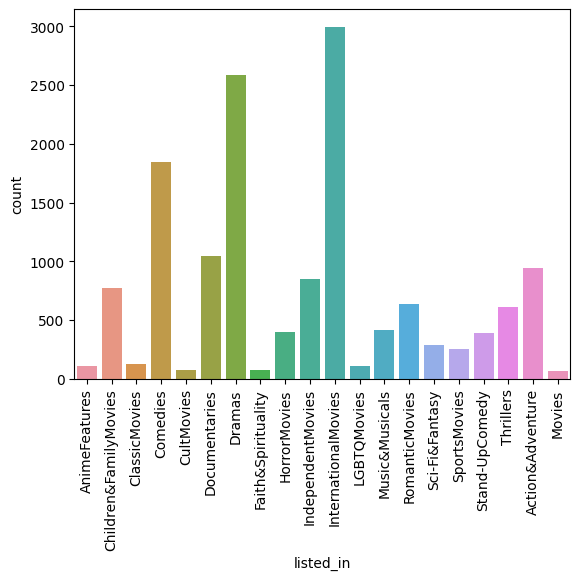

In [ ]:

sns.countplot(x='listed_in',data= Movie_genre)
plt.xticks(rotation =90)
plt.show()

**Insights:** The above insights says that the the platform contain maximum of international movies,dramas and comedies movies and least among them are faith& spirituality movie, classic movies and anime feature

**recommendation:** Netflix should increase faith& spirituality movie, classic movies and anime feature as it would help them increase the user base who watch such content

#Q5. Does Netflix have  more focus on TV Shows than movies in recent years

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  years         8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


From the original data it is clear that type and release year have all availablecolumn for analysis so we no need any cleaning and get analysis from this data itself except for doing input of year column in which the movies and tv shows were added on platform and filling null values if any



In [ ]:
data['years'] = data['date_added'].dt.year

In [ ]:
data['years'].isna().sum()

10

for recent year we will check for years greater than 2010

In [ ]:
Netflix_year_data = data.loc[data['years'] >= 2010 , ['type','years']]

In [ ]:
Netflix_year_data['years'].fillna(0,inplace =True)

In [ ]:
Netflix_year_data['years'].astype(int)

In [ ]:
Netflix_year_data['years']=  Netflix_year_data['years'].astype(int)

In [ ]:
Netflix_year_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8793 non-null   object
 1   years   8793 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 206.1+ KB


<Axes: xlabel='years', ylabel='count'>

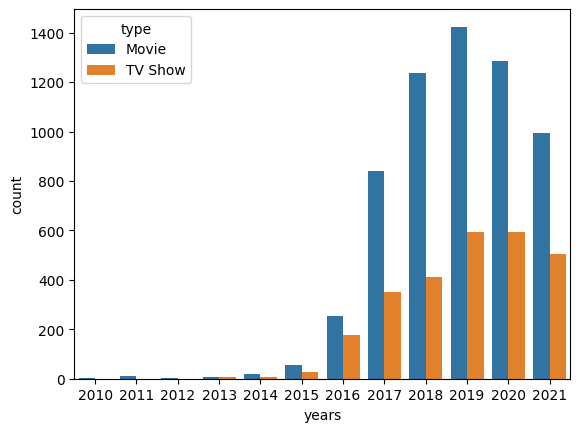

In [ ]:

sns.countplot(x='years',data= Netflix_year_data , hue='type')

**Insight**: from above data it is clear that Netflix have more focused on Movies than tv shows as in all year from 2010 till 2021 the Movies shows on platform were more as comparision to Tv shows

**Recommendation**:  Ntflix need to more focus on Tv shows for increasing user base

#Q6:Understanding what content is available in different countries

To deal with this problem we will use already filtered and cleaned data , Which is data_exploded!!

In [ ]:
data_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201878 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201878 non-null  object
 1   type          201878 non-null  object
 2   title         201878 non-null  object
 3   director      201878 non-null  object
 4   cast          201878 non-null  object
 5   country       201878 non-null  object
 6   date_added    201721 non-null  object
 7   release_year  201878 non-null  int64 
 8   rating        201813 non-null  object
 9   duration      201875 non-null  object
 10  listed_in     201878 non-null  object
 11  description   201878 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


we have all available data for our analysis but we need to clean and align the listed_in column having unproper alignment and multiple occurence

In [ ]:
country_genre =data_exploded[['listed_in','country']].copy()
country_genre['listed_in'] = country_genre['listed_in'].str.split(" ")
country_genre['listed_in'] = country_genre['listed_in'].str.join("")

In [ ]:
country_genre['listed_in'].unique()

array(['Documentaries', 'InternationalTVShows', 'TVDramas', 'TVMysteries',
       'CrimeTVShows', 'TVAction&Adventure', 'RomanticTVShows',
       'TVComedies', 'TVHorror', 'Children&FamilyMovies', 'Dramas',
       'IndependentMovies', 'InternationalMovies', 'BritishTVShows',
       'RealityTV', 'Comedies', 'Spanish-LanguageTVShows', 'Thrillers',
       'Docuseries', 'RomanticMovies', 'Music&Musicals', 'HorrorMovies',
       'Sci-Fi&Fantasy', 'TVThrillers', "Kids'TV", 'Action&Adventure',
       'TVSci-Fi&Fantasy', 'ClassicMovies', 'AnimeFeatures',
       'SportsMovies', 'AnimeSeries', 'KoreanTVShows', 'Science&NatureTV',
       'TeenTVShows', 'CultMovies', 'TVShows', 'Faith&Spirituality',
       'LGBTQMovies', 'Stand-UpComedy', 'Movies',
       'Stand-UpComedy&TalkShows', 'Classic&CultTV'], dtype=object)

In [ ]:
country_genre  = country_genre.groupby(['country','listed_in']).value_counts().reset_index(name='counts')
country_genre

,country,listed_in,counts
0,,ClassicMovies,9
1,,Documentaries,2
2,,Dramas,40
3,,IndependentMovies,9
4,,InternationalMovies,41
...,...,...,...
2045,West Germany,Documentaries,2
2046,West Germany,InternationalMovies,2
2047,Zimbabwe,Comedies,12
2048,Zimbabwe,InternationalMovies,12


we can make count plot(bar plot) for above observation!!

In [ ]:
country_genre_counts = country_genre.groupby('listed_in')['country'].value_counts().rename('counts_of_genre_countrywise').reset_index()


In [ ]:
country_genre_counts

,listed_in,country,counts_of_genre_countrywise
0,Action&Adventure,Angola,1
1,Action&Adventure,Argentina,1
2,Action&Adventure,Australia,1
3,Action&Adventure,Bahamas,1
4,Action&Adventure,Belgium,1
...,...,...,...
2045,Thrillers,Turkey,1
2046,Thrillers,United Arab Emirates,1
2047,Thrillers,United Kingdom,1
2048,Thrillers,United States,1


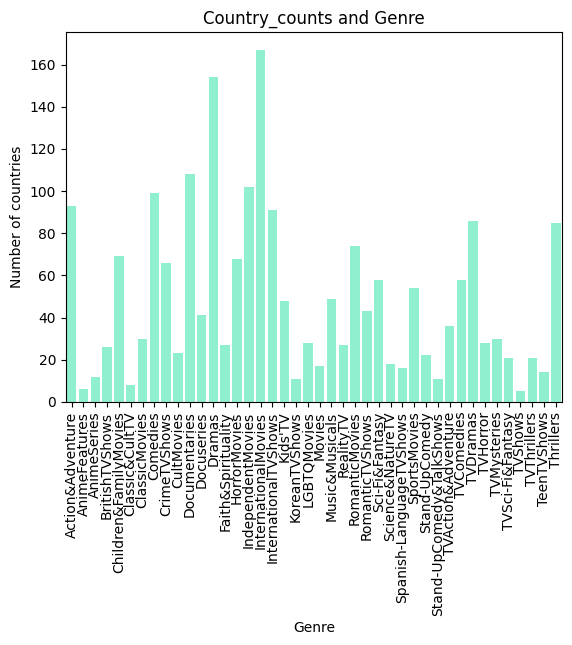

In [ ]:

sns.countplot(data=country_genre_counts, x='listed_in', color='aquamarine').set(title='Country_counts and Genre', xlabel='Genre', ylabel='Number of countries')
plt.xticks(rotation = 90)
plt.show()

**Insight** the above insight shows that *international movies, drama* having most of the countries of origin

To get country wise data which having the most genre produced by them are fetched as follows

The below process is done to fetch the the most popular genre in all country for better understanding

In [ ]:
country_genre_counts

,listed_in,country,counts_of_genre_countrywise
0,Action&Adventure,Angola,1
1,Action&Adventure,Argentina,1
2,Action&Adventure,Australia,1
3,Action&Adventure,Bahamas,1
4,Action&Adventure,Belgium,1
...,...,...,...
2045,Thrillers,Turkey,1
2046,Thrillers,United Arab Emirates,1
2047,Thrillers,United Kingdom,1
2048,Thrillers,United States,1


In [ ]:
country_genre_max_counts = country_genre_counts.groupby('country').apply(lambda x: x.loc[x['counts_of_genre_countrywise'].idxmax()]).reset_index(drop=True)


In [ ]:
country_genre_max_counts.drop("counts_of_genre_countrywise",axis= 1,inplace=True)

country producing thier most content in the respective genre we can get through by below code

i had checked for Comedy , Action and adventure, Children&FamilyMovies



#comedy

In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Comedies']

,listed_in,country
24,Comedies,Croatia
50,Comedies,Jordan
60,Comedies,Malaysia
68,Comedies,Netherlands
73,Comedies,Pakistan
76,Comedies,Peru
79,Comedies,Portugal
81,Comedies,Romania
98,Comedies,Syria
107,Comedies,Uruguay


#Action and adventure

In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Action&Adventure']

,listed_in,country
4,Action&Adventure,Angola
5,Action&Adventure,Argentina
7,Action&Adventure,Australia
10,Action&Adventure,Bahamas
12,Action&Adventure,Belgium
...,...,...
188,Action&Adventure,Turkey
190,Action&Adventure,United Arab Emirates
191,Action&Adventure,United Kingdom
192,Action&Adventure,United States


#Children&FamilyMovies

In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Children&FamilyMovies']

,listed_in,country
20,Children&FamilyMovies,Cayman Islands
29,Children&FamilyMovies,East Germany
51,Children&FamilyMovies,Kazakhstan
55,Children&FamilyMovies,Lebanon
59,Children&FamilyMovies,Malawi
77,Children&FamilyMovies,Philippines
80,Children&FamilyMovies,Qatar
110,Children&FamilyMovies,West Germany
117,Children&FamilyMovies,Belgium
123,Children&FamilyMovies,Chile


#Documentaries

In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Documentaries'].head(15)

,listed_in,country
1,Documentaries,Afghanistan
6,Documentaries,Armenia
13,Documentaries,Bermuda
14,Documentaries,Botswana
30,Documentaries,Ecuador
38,Documentaries,Guatemala
45,Documentaries,Iraq
63,Documentaries,Mongolia
66,Documentaries,Namibia
70,Documentaries,Nicaragua


#Q4. Actor/Director - Analysis  basis on Genre,duration,country,year they were added



Creating a new table applying cleaning and changing data type

In [ ]:
Actor_director =data_exploded.copy()


In [ ]:

Actor_director['listed_in'] = Actor_director['listed_in'].str.split(" ")
Actor_director['listed_in'] = Actor_director['listed_in'].str.join("")
Actor_director['date_added'] = pd.to_datetime(Actor_director['date_added'])
Actor_director['years'] = Actor_director['date_added'].dt.year
Actor_director['years'].fillna(0,inplace =True)
Actor_director['years']=  Actor_director['years'].astype(int)

In [ ]:
Actor_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201878 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201878 non-null  object        
 1   type          201878 non-null  object        
 2   title         201878 non-null  object        
 3   director      201878 non-null  object        
 4   cast          201878 non-null  object        
 5   country       201878 non-null  object        
 6   date_added    201721 non-null  datetime64[ns]
 7   release_year  201878 non-null  int64         
 8   rating        201813 non-null  object        
 9   duration      201875 non-null  object        
 10  listed_in     201878 non-null  object        
 11  description   201878 non-null  object        
 12  years         201878 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 21.6+ MB


Checking Alignment of listed_in column values

In [ ]:
Actor_director['listed_in'].value_counts()

Dramas                      29802
InternationalMovies         28237
Comedies                    20827
InternationalTVShows        12819
Action&Adventure            12216
IndependentMovies            9834
Children&FamilyMovies        9764
TVDramas                     8941
Thrillers                    7107
RomanticMovies               6410
TVComedies                   4953
CrimeTVShows                 4723
HorrorMovies                 4571
Kids'TV                      4552
Sci-Fi&Fantasy               4037
Music&Musicals               3075
RomanticTVShows              3040
Documentaries                2403
AnimeSeries                  2312
TVAction&Adventure           2287
Spanish-LanguageTVShows      2122
BritishTVShows               1800
SportsMovies                 1529
ClassicMovies                1443
TVMysteries                  1280
KoreanTVShows                1121
CultMovies                   1077
TVSci-Fi&Fantasy             1045
AnimeFeatures                1044
TVHorror      

## Seperating Movies and TV show table for Analysis seperately

**Tv Shows**

In [ ]:
tvshow = Actor_director.loc[Actor_director['type']=='TV Show']

In [ ]:
tvshow

In [ ]:
tvshow['duration'].info()

In [ ]:
tvshow_new = tvshow.copy()

In [ ]:
tvshow_new

In [ ]:
tvshow_new['duration']  =  tvshow_new['duration'].str.split(" ")


In [ ]:
tvshow_new["Seasons"] = tvshow_new["duration"].str[0]

In [ ]:
tvshow_new['Seasons'] = tvshow_new['Seasons'].astype(int)

In [ ]:
tvshow_new

In [ ]:
tvshow_new['Seasons'].unique()

array([ 2,  1,  9,  4,  5,  3,  6,  7, 10,  8, 17, 13, 15, 12, 11])

In [ ]:
tvshow_new[['Seasons','show_id']].groupby(['show_id','Seasons'])['show_id'].aggregate('count').rename({'show_id':'counts'},inplace=True)

In [ ]:
Cleaned_tvshowdata = tvshow_new[['Seasons','show_id']].groupby(['show_id','Seasons']).value_counts().reset_index()

In [ ]:
Cleaned_tvshowdata.drop(0,axis= 1,inplace =True)

In [ ]:
Cleaned_tvshowdata

,show_id,Seasons
0,s100,1
1,s1004,1
2,s1005,2
3,s101,2
4,s1013,2
...,...,...
2591,s98,2
2592,s989,1
2593,s99,1
2594,s994,1


generating plot to analyse the data with to check which seasons duration have how many number of shows

In [ ]:
season_counts= Cleaned_tvshowdata['Seasons'].value_counts()
season_counts

1     1721
2      419
3      197
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
12       2
11       2
17       1
Name: Seasons, dtype: int64

Text(0.5, 1.0, 'Number_of_TV Show and Seasons')

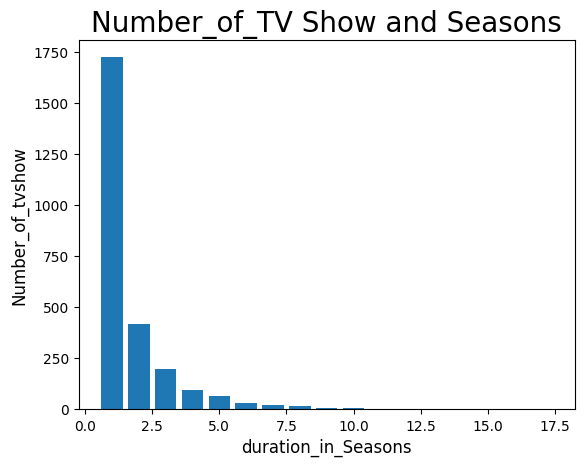

In [ ]:
y = Cleaned_tvshowdata['Seasons'].value_counts()
x= y.index
plt.bar(x,y)
plt.xlabel('duration_in_Seasons',fontsize=12)
plt.ylabel('Number_of_tvshow',fontsize=12)
plt.title('Number_of_TV Show and Seasons',fontsize=20)

**Insights**:  Most of the content on netflix platform are of Tv less than 2.5 seasons

**Recommendation**: Incentive,offers or schemes should be provided to users to watch greater than 2.5 seasons of Tv shows for more retention rate

## Q-now checking the number of Tv shows added according to years at the platform so we will use tvshow_new dataframe as we have already cleaned it

In [ ]:
tvshow_new

In [ ]:
cleaned_yearwise_tvshow_data = tvshow_new[['years','show_id']].groupby(['show_id','years']).value_counts().reset_index()

In [ ]:
cleaned_yearwise_tvshow_data

In [ ]:
cleaned_yearwise_tvshow_data.drop(0,axis= 1,inplace =True)

In [ ]:
cleaned_yearwise_tvshow_data

for visualising this *univariate* data analysis we will use Histplot using seaborn library

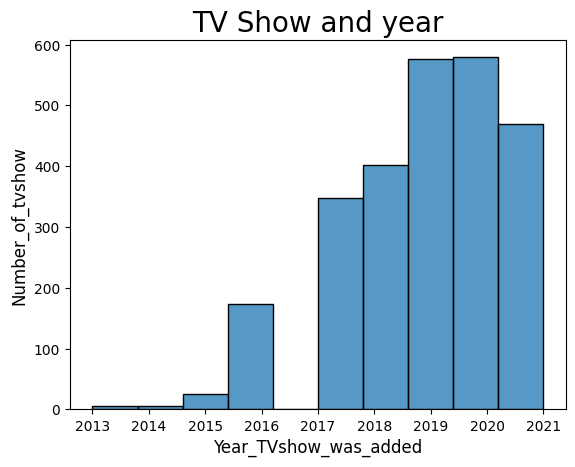

In [ ]:
sns.histplot(cleaned_yearwise_tvshow_data[cleaned_yearwise_tvshow_data['years'] >= 2010]['years'],bins= 10)
plt.xlabel('Year_TVshow_was_added',fontsize=12)
plt.ylabel('Number_of_tvshow',fontsize=12)
plt.title('TV Show and year',fontsize=20)
plt.show()

**Insights:**  most of the tv shows added were from 2017 till 2021

#if we want to check which cast/Actor have worked in most of the tv shows

In [ ]:
Actorwise_tvshow_data = tvshow_new[['cast','show_id']].groupby(['show_id','cast']).value_counts().reset_index()
Actorwise_tvshow_data.drop(0,axis= 1,inplace =True)

In [ ]:
cast_inmost_Tvshows = Actorwise_tvshow_data['cast'].value_counts().head(10).to_frame().reset_index()

In [ ]:
cast_inmost_Tvshows.columns = ['cast_name','their_number_of_shows']

In [ ]:
cast_inmost_Tvshows

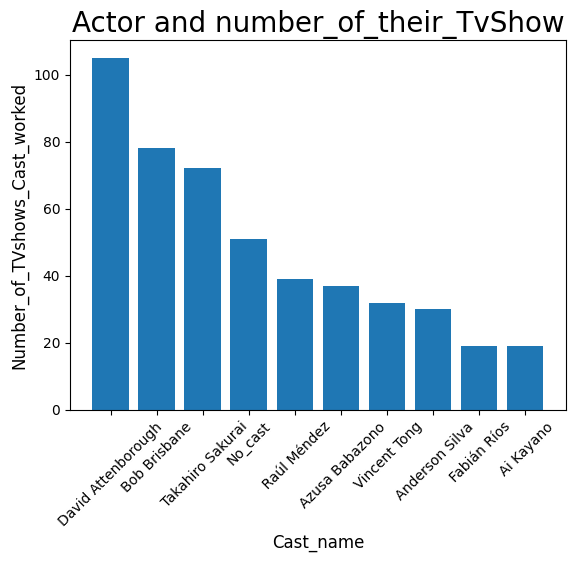

In [ ]:
x= cast_inmost_Tvshows['cast_name']
y = cast_inmost_Tvshows['their_number_of_shows']

plt.bar(x,y)
plt.xlabel('Cast_name',fontsize=12)
plt.ylabel('Number_of_TVshows_Cast_worked',fontsize=12)
plt.title('Actor and number_of_their_TvShow',fontsize=20)
plt.xticks(rotation= 45)
plt.show()


**Insights:**: from the graph it is visible that David Attenborough , Bob Brisbane , Takahiro Sakurai  are the Actors who have their maximum number of Tv shows available on Netflix platform

**Recommendation:** netflix with the cast with less available contnet on platform should be increased with their other tv shows

###Movies (actor and director analysis)     here we will use Actor_director data that we cleaned it

In [ ]:
Actor_director

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,years
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,InternationalTVShows,"After crossing paths at a party, a Cape Town t...",2021
2,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TVDramas,"After crossing paths at a party, a Cape Town t...",2021
3,s2,TV Show,Blood & Water,Rob Seidenglanz,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TVMysteries,"After crossing paths at a party, a Cape Town t...",2021
4,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,InternationalTVShows,"After crossing paths at a party, a Cape Town t...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,InternationalMovies,A scrappy but poor boy worms his way into a ty...,2019
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music&Musicals,A scrappy but poor boy worms his way into a ty...,2019
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,InternationalMovies,A scrappy but poor boy worms his way into a ty...,2019


##Here we will extract Movies from the data and clean and filter it to analysis on metrics

Q2. remaining analysis


In [ ]:
Movies_new =Actor_director.loc[Actor_director['type'] == 'Movie']

In [ ]:
Movies_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,years
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,No_data,2021-09-24,2021,PG,91 min,Children&FamilyMovies,Equestria's divided. But a bright-eyed hero be...,2021
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,No_data,2021-09-24,2021,PG,91 min,Children&FamilyMovies,Equestria's divided. But a bright-eyed hero be...,2021
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,No_data,2021-09-24,2021,PG,91 min,Children&FamilyMovies,Equestria's divided. But a bright-eyed hero be...,2021
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,No_data,2021-09-24,2021,PG,91 min,Children&FamilyMovies,Equestria's divided. But a bright-eyed hero be...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,InternationalMovies,A scrappy but poor boy worms his way into a ty...,2019
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music&Musicals,A scrappy but poor boy worms his way into a ty...,2019
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,InternationalMovies,A scrappy but poor boy worms his way into a ty...,2019


#Countries with most number of movies

In [ ]:
Movies_new1 = Movies_new[['show_id','country']].groupby(['show_id','country']).value_counts().reset_index()
Movies_new1.drop(0,axis= 1,inplace =True)

we have to align countries as they are similar but not aligned so we are facing repetative values

In [ ]:
Movies_new1['country'] = Movies_new1['country'].str.split(" ")


In [ ]:
Movies_new1['country'] = Movies_new1['country'].str.join("")

In [ ]:
Movies_new1

In [ ]:
Movies_new2 = Movies_new1['country'].value_counts().reset_index()

In [ ]:
Movies_new2.columns =['country','Number_of_movies']

In [ ]:
movie = Movies_new2.head(10)

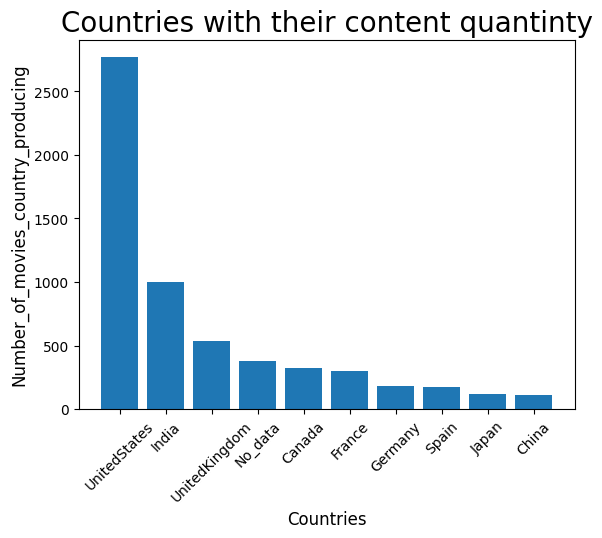

In [ ]:
x= movie['country']
y = movie['Number_of_movies']
plt.bar(x,y)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number_of_movies_country_producing',fontsize=12)
plt.title('Countries with their content quantinty',fontsize=20)
plt.xticks(rotation= 45)
plt.show()

**Insight:**  it is clear that United States have the most available movies on netflix followed by india and united kingdom

**Recommendation:** countries like japan,china ,cpain, germany movies are less available on paltform so the netflix should decide on increasing there content from those countries which have less content on it ass more users across the globe fromm different countries could acess their native countries movies